In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Analysis

In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Categorical data
- Sex columns
- Smoker columns
- Region columns

### EDA

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/var/folders/5f/0hb_qs091gb66mrrdykchhyw0000gn/T/ipykernel_66125/1195751929.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


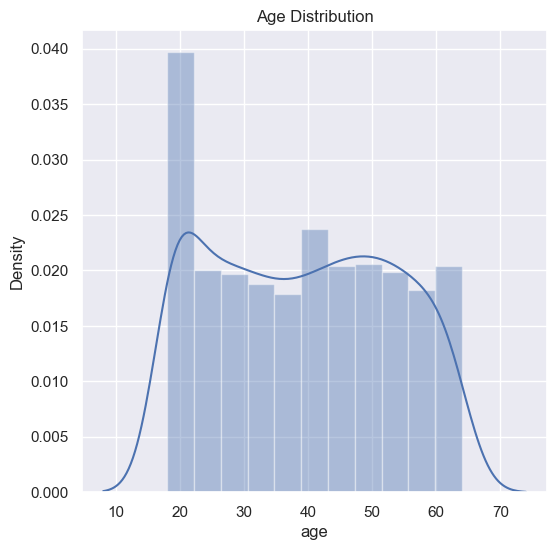

In [10]:
# age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

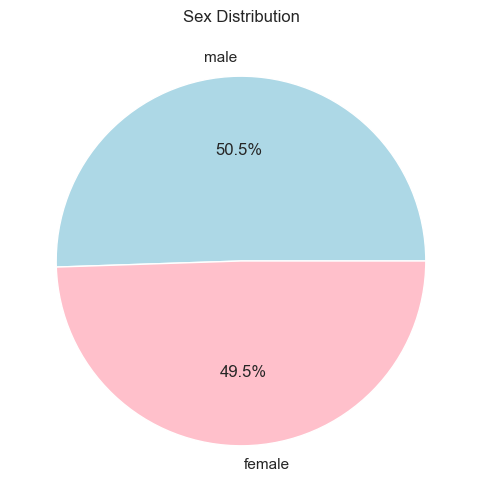

In [18]:
# Count occurrences of each gender
sex_counts = df['sex'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Sex Distribution')
plt.show()

In [19]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/var/folders/5f/0hb_qs091gb66mrrdykchhyw0000gn/T/ipykernel_66125/1388665786.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


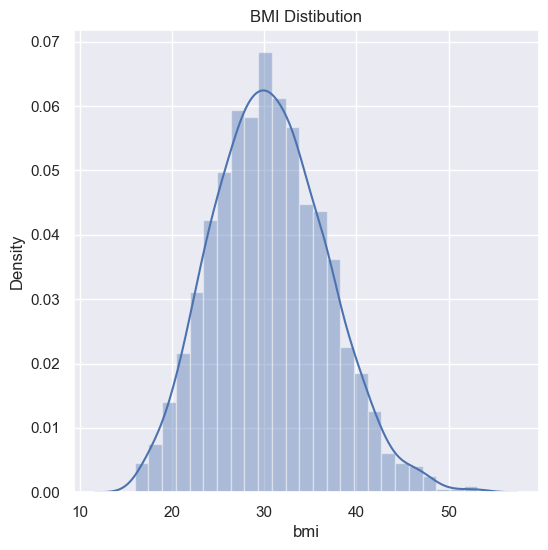

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distibution')
plt.show()

In [21]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [22]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

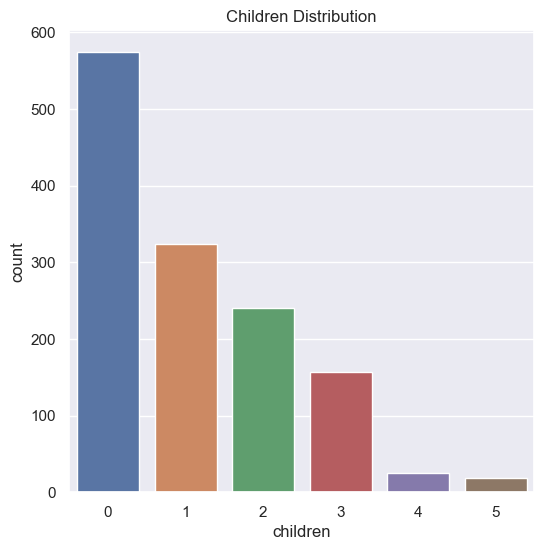

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()

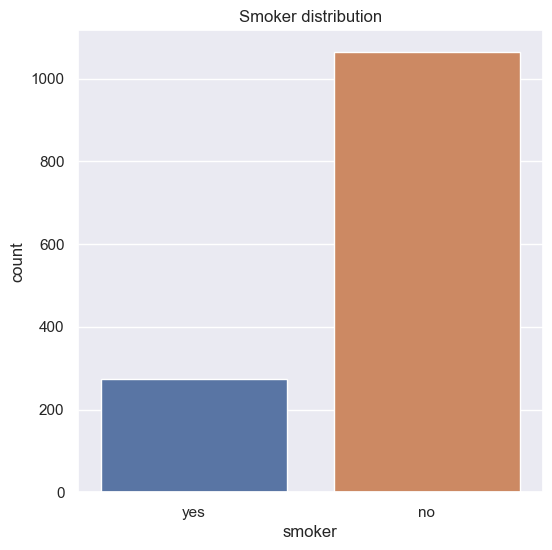

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker distribution')
plt.show()

/var/folders/5f/0hb_qs091gb66mrrdykchhyw0000gn/T/ipykernel_66125/81326626.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


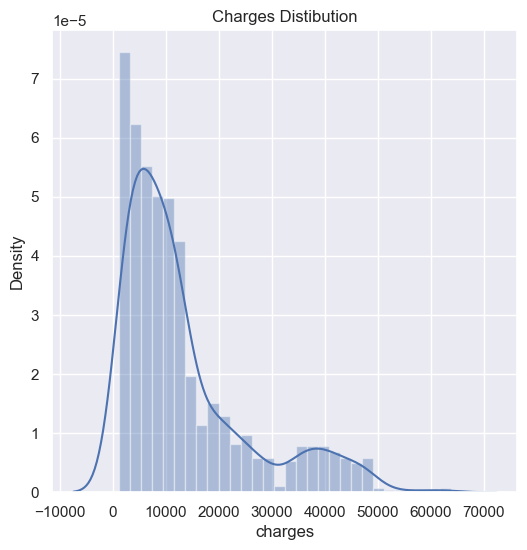

In [29]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distibution')
plt.show()

In [30]:
# convert sex column into categorical
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [31]:
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [33]:
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [34]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
549,43,1,46.200,0,0,0,45863.20500
227,58,1,41.910,0,1,0,24227.33724
163,32,1,29.800,2,1,1,5152.13400
628,58,0,38.000,0,1,1,11365.95200
1174,29,0,32.110,2,1,3,4433.91590
548,25,1,28.595,0,1,2,3213.62205
979,36,1,29.920,0,1,0,4889.03680
1278,39,0,29.925,1,0,2,22462.04375
41,31,1,36.630,2,1,0,4949.75870
20,60,1,36.005,0,1,2,13228.84695


### ML model

In [35]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [36]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [37]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [40]:
# train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
# Linear Regression 
lr = LinearRegression()

In [42]:
lr.fit(X_train, Y_train)

LinearRegression()

In [44]:
# model evaluation

predict = lr.predict(X_train) # for prediction

In [45]:
# R squared error

In [47]:
r2 = metrics.r2_score(Y_train, predict)
r2

0.751505643411174

In [50]:
predict_test = lr.predict(X_test)

In [51]:
r2_test = metrics.r2_score(Y_test, predict_test)
r2

0.751505643411174

In [52]:
# prediction on data with our model

In [58]:
input_data = (54, 1, 30.8, 3, 1, 1) # 54, female, 30.8, 3, no, southwest -> 12105

# change data into array
input_data_arr = np.asarray(input_data)

# reshape the array
input_data_arr = input_data_arr.reshape(1, -1)

prediction = lr.predict(input_data_arr)

prediction[0]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13168.51459785834

# 